# **TP1 - Redes Neuronales 16.32**
## *Valentina Gonzalez - 59128*

### Librerías

In [368]:
!pip install seaborn
!pip install jinja2
!pip install statsmodels


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: C:\Users\vale_\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: C:\Users\vale_\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: C:\Users\vale_\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [540]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import mean_squared_log_error, mean_squared_error,mean_absolute_error, r2_score

### Problema de Clasificación - Dataset Yeast 

#### Abro el dataset


Observando el yeast.names vemos que se trata de un CSV con un set de datos acerca de 1484 bacterias que pueden pertenecer a 10 clases distintas (ubicacion de las proteinas) y al que se le calcularon 9 atributos (8 predictivos y 1 nombre) 

In [484]:
path1 = '/Users/vale_/OneDrive/Documents/Redes Neuronales/yeast.data'
nombres_atributos = ['mcg','gvh','alm','mit','erl','pox','vac','nuc']
df = pd.read_csv(path1,names = nombres_atributos + ['clase'], sep='\s+')
print(df)

             mcg   gvh   alm   mit  erl  pox   vac   nuc clase
ADT1_YEAST  0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22   MIT
ADT2_YEAST  0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22   MIT
ADT3_YEAST  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22   MIT
AAR2_YEAST  0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22   NUC
AATM_YEAST  0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22   MIT
...          ...   ...   ...   ...  ...  ...   ...   ...   ...
YUR1_YEAST  0.81  0.62  0.43  0.17  0.5  0.0  0.53  0.22   ME2
ZIP1_YEAST  0.47  0.43  0.61  0.40  0.5  0.0  0.48  0.47   NUC
ZNRP_YEAST  0.67  0.57  0.36  0.19  0.5  0.0  0.56  0.22   ME2
ZUO1_YEAST  0.43  0.40  0.60  0.16  0.5  0.0  0.53  0.39   NUC
G6PD_YEAST  0.65  0.54  0.54  0.13  0.5  0.0  0.53  0.22   CYT

[1484 rows x 9 columns]


#### EDA - Análisis exploratorio de datos

Primero, queremos realizar un análisis exploratorio de datos para comprender cómo las características de los datos se relacionan entre sí. Esto nos ayudará a comprender cómo modelar los datos más adelante.

##### Análisis de datos

Observo los valores numéricos que pueden ser importantes, como la media, la desviación estándar y el recuento de los valores

In [373]:
df.describe()


,mcg,gvh,alm,mit,erl,pox,vac,nuc
count,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,0.500121,0.499933,0.500034,0.261186,0.504717,0.007500,0.499885,0.276199
std,0.137299,0.123924,0.086670,0.137098,0.048351,0.075683,0.057797,0.106491
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


Los resultados anteriores nos permiten extraer ideas y tendencias clave acerca de los datos. Por ejemplo, de los datos proporcionados podríamos inferir que, en promedio, los valores más altos están en la columna MCG, GVH, ALM, VAC y ERL mientras que los más bajos están en la columna POX . 

##### Balance de clases

In [371]:
print('Repetición de cada clase:\n')
df.clase.value_counts()

Repetición de cada clase:



CYT    463
NUC    429
MIT    244
ME3    163
ME2     51
ME1     44
EXC     35
VAC     30
POX     20
ERL      5
Name: clase, dtype: int64

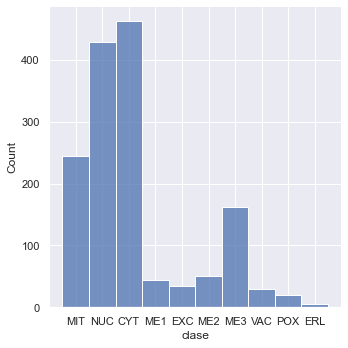

In [389]:
sns.set_theme()
sns.displot(df, x="clase")

Observo que las clases mas significativas son: CYT, NUC, MIT y ME3. 

In [372]:
print('Balance de clases:\n')
df.clase.value_counts()/len(df)

Balance de clases:



CYT    0.311995
NUC    0.289084
MIT    0.164420
ME3    0.109838
ME2    0.034367
ME1    0.029650
EXC    0.023585
VAC    0.020216
POX    0.013477
ERL    0.003369
Name: clase, dtype: float64

##### Distribución de los atributos

C:\Users\vale_\AppData\Local\Temp\ipykernel_14868\3105721313.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.drop(columns='clase').hist(ax=ax,bins=30)


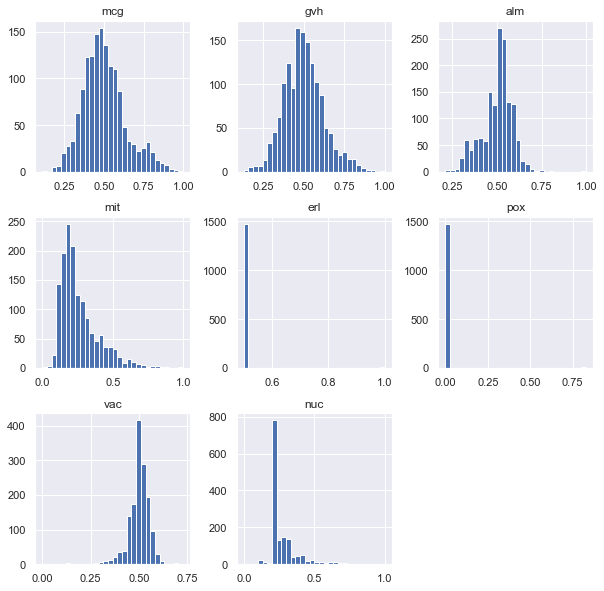

In [388]:
fig, ax =plt.subplots(figsize=(10,10))
df.drop(columns='clase').hist(ax=ax,bins=30)
plt.show()

A priori, podemos observar que los atributos erl y pox pertenecen en su mayoría a la misma clase. Además sabemos por el balance de clases que ambas clases (erl y pox) son muy poco significativas en relación a las demás.

##### Boxplots para todos los atributos

<AxesSubplot:xlabel='clase', ylabel='nuc'>

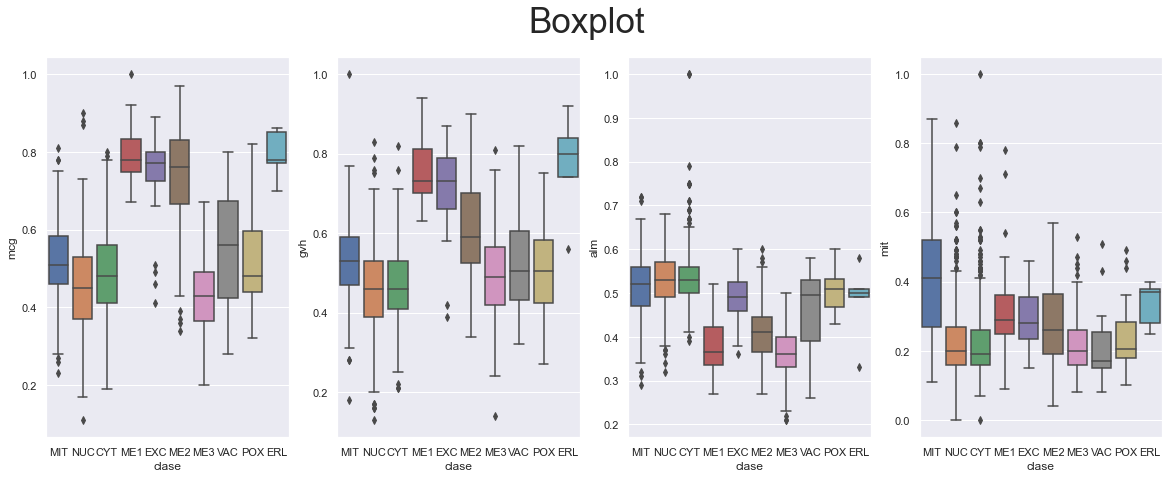

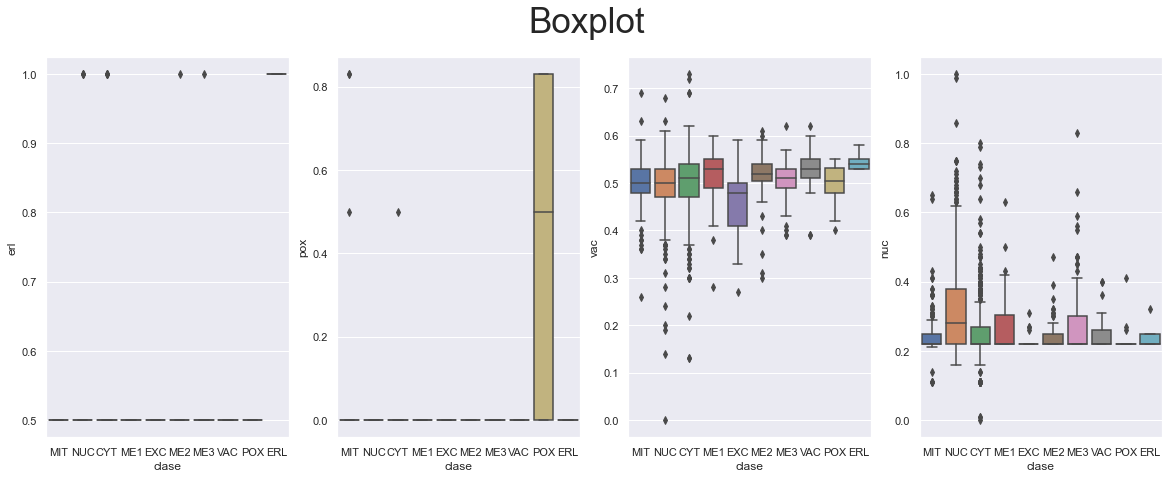

In [375]:
fig, (ax1, ax2, ax3,ax4) = plt.subplots(1,4,figsize=(20,7))

fig.suptitle("Boxplot", fontsize=35)


sns.boxplot(x="clase", y="mcg", data=df,ax=ax1)
sns.boxplot(x="clase", y="gvh", data=df,ax=ax2)
sns.boxplot(x="clase", y="alm", data=df,ax=ax3)
sns.boxplot(x="clase", y="mit", data=df,ax=ax4)

fig, (ax1, ax2, ax3,ax4) = plt.subplots(1,4,figsize=(20,7))

fig.suptitle("Boxplot", fontsize=35)


sns.boxplot(x="clase", y="erl", data=df,ax=ax1)
sns.boxplot(x="clase", y="pox", data=df,ax=ax2)
sns.boxplot(x="clase", y="vac", data=df,ax=ax3)
sns.boxplot(x="clase", y="nuc", data=df,ax=ax4)

Vemos que los atributos mcg y gvh son bastante similares, con lo cual es posible que no agreguen diferentes inferencias al modelo.

<AxesSubplot:>

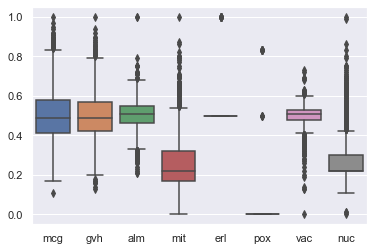

In [376]:
sns.boxplot(df)

##### Correlaciones de a pares de las variables e histogramas

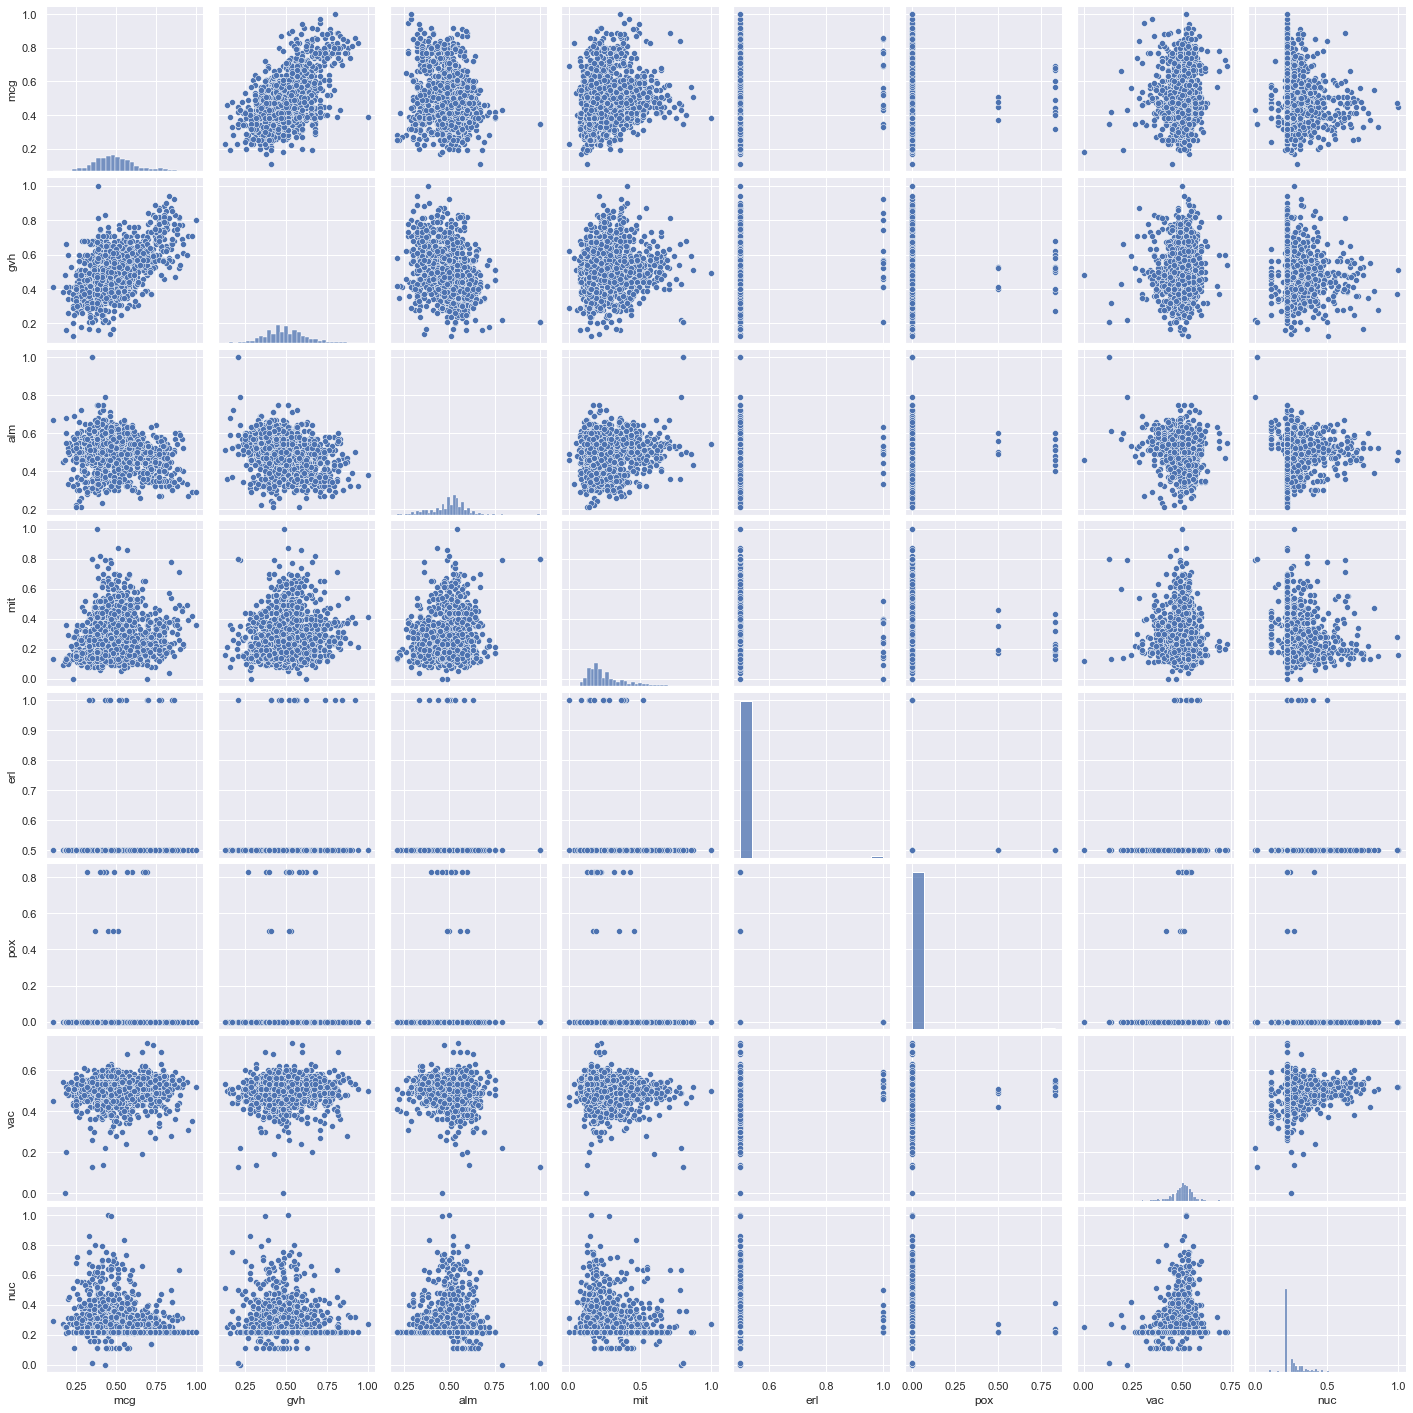

In [377]:
sns.pairplot(df, kind = 'scatter')

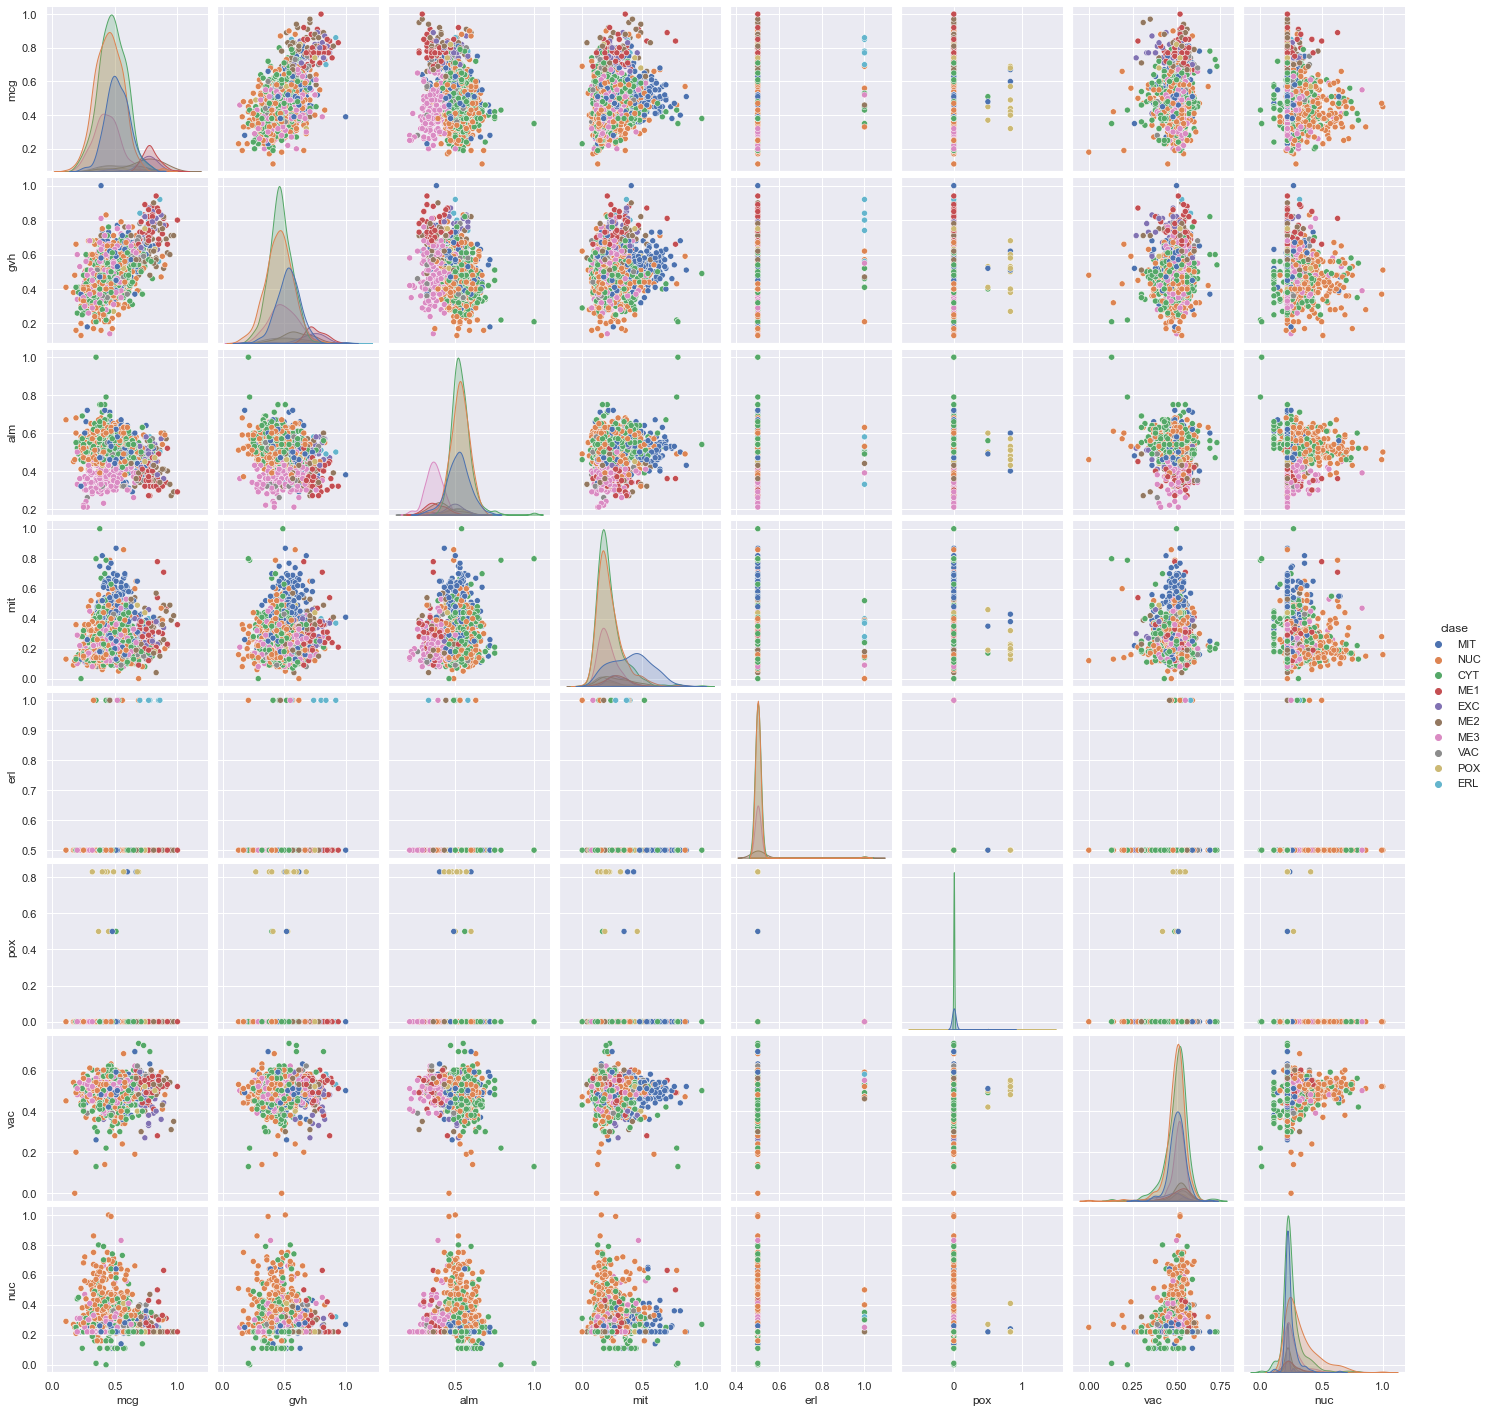

In [378]:
sns.pairplot(df, kind = 'scatter', hue='clase')

Vemos que las distribuciones estan bastante encimadas, en particular, no se observa ninguna separación clara entre los datos. 

##### Matriz de correlación

In [379]:
corr = df.corr()
corr.style.background_gradient()
corr.style.background_gradient().set_precision(2)

C:\Users\vale_\AppData\Local\Temp\ipykernel_14868\542444484.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient().set_precision(2)


,mcg,gvh,alm,mit,erl,pox,vac,nuc
mcg,1.00,0.58,-0.16,0.16,0.06,0.01,0.08,-0.12
gvh,0.58,1.00,-0.27,0.14,0.06,0.00,0.09,-0.10
alm,-0.16,-0.27,1.00,0.06,-0.01,0.01,-0.19,-0.02
mit,0.16,0.14,0.06,1.00,-0.01,-0.01,-0.10,-0.05
erl,0.06,0.06,-0.01,-0.01,1.00,-0.01,0.04,0.00
pox,0.01,0.00,0.01,-0.01,-0.01,1.00,0.02,-0.04
vac,0.08,0.09,-0.19,-0.10,0.04,0.02,1.00,0.09
nuc,-0.12,-0.10,-0.02,-0.05,0.00,-0.04,0.09,1.00


Como fue visto en los boxplots tambien, observamos que los atributos mcg y gvh tienen una correlación bastante alta.


#### Clasificación

Divido mi dataset en dos: 70% para train y 30% para test. 


In [443]:
df_train, df_test = train_test_split(df, test_size=0.3, stratify=df["clase"], random_state=42)
df_train.head()



,mcg,gvh,alm,mit,erl,pox,vac,nuc,clase
SWI6_YEAST,0.41,0.56,0.53,0.16,0.5,0.0,0.55,0.26,NUC
RPB3_YEAST,0.54,0.57,0.55,0.18,0.5,0.0,0.50,0.22,NUC
CBP1_YEAST,0.45,0.45,0.50,0.60,0.5,0.0,0.49,0.22,MIT
YB52_YEAST,0.58,0.50,0.50,0.12,0.5,0.0,0.48,0.25,NUC
DPOE_YEAST,0.37,0.48,0.50,0.26,0.5,0.0,0.52,0.39,NUC


In [458]:
def clf_multiclase(df,model):
    
    df_train, df_test = train_test_split(df, test_size=0.3, stratify=df["clase"], random_state=42)

    enc = LabelEncoder()
    y_train = enc.fit_transform(df_train.clase.values)
    y_test = enc.transform(df_test.clase.values)

    keys = ["mcg","alm","gvh","mit","nuc"]
    model.fit(df_train[keys].values, y_train)

    print("Score train:", model.score(df_train[keys].values, y_train))
    print("Score test:", model.score(df_test[keys].values, y_test))

    cv = cross_validate(estimator=model,X=df_train[keys].values,y=y_train,cv= 10,scoring=('f1_micro','f1_macro'))
    
    macro_test = np.mean(cv['test_f1_macro'])
    micro_test = np.mean(cv['test_f1_micro'])

    print("Micro F1 score:", micro_test)
    print("Macro F1 score:", macro_test) 


y_prediction = model.predict(X_test)

    X_train, X_test, y_train, y_test = train_test_split(df_train,y_train, test_size = 0.3, random_state = 25)

    count_misclassified = (y_train != y_prediction).sum()
    print('Misclassified samples: {}'.format(count_misclassified))
    accuracy = metrics.accuracy_score(y_test, y_prediction)
    print('Accuracy: {:.2f}'.format(accuracy))
    precision = metrics.precision_score(y_test, y_prediction, average= 'macro')
    print('Precision: {:.2f}'.format(precision))
    recall = metrics.recall_score(y_test, y_prediction, average= 'macro')
    print('Recall: {:.2f}'.format(recall))
    f1_score = metrics.f1_score(y_test, y_prediction, average = 'macro')
    print('F1 score: {:.2f}'.format(f1_score))

##### Modelos: Regresión Logistica, LDA, QDA

In [457]:
print("Resultados para el modelo de Regresión Logistica:")
clf_multiclase(df,LogisticRegression())

print("\nResultados para el modelo de LDA:")
clf_multiclase(df,LinearDiscriminantAnalysis())

print("\nResultados para el modelo de QDA:")
clf_multiclase(df,QuadraticDiscriminantAnalysis())


Resultados para el modelo de Regresión Logistica:
Score train: 0.5481695568400771
Score test: 0.5493273542600897


C:\Users\vale_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


Micro F1 score: 0.5374906646751307
Macro F1 score: 0.30305891386171185

Resultados para el modelo de LDA:
Score train: 0.5934489402697495
Score test: 0.5852017937219731
Micro F1 score: 0.5895351008215085
Macro F1 score: 0.4409233009103815

Resultados para el modelo de QDA:
Score train: 0.5751445086705202
Score test: 0.594170403587444
Micro F1 score: 0.5500466766243466
Macro F1 score: 0.4137219862028799


C:\Users\vale_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vale_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\vale_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vale_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\discriminant_analysis.

Vemos que, comparando con lo obtenido previamente en el balance de clases, el modelo predice con un score alto las clases.

Ademas vemos que LDA es el que mejores resultados devuelve.

#### Clasificación Binaria

##### Dos clases mas significativas: CYT y NUC.

In [485]:
df.index.is_unique


False

In [490]:
df_sin_dups=df.loc[~df.index.duplicated(), :]

df_bin = df_sin_dups.copy()

df_bin = df_bin.drop(df_bin[df_sin_dups['clase'] == 'ERL'].index)
df_bin = df_bin.drop(df_bin[df_sin_dups['clase'] == 'EXC'].index)
df_bin = df_bin.drop(df_bin[df_sin_dups['clase'] == 'ME2'].index)
df_bin = df_bin.drop(df_bin[df_sin_dups['clase'] == 'VAC'].index)
df_bin = df_bin.drop(df_bin[df_sin_dups['clase'] == 'MIT'].index)
df_bin = df_bin.drop(df_bin[df_sin_dups['clase'] == 'ME3'].index)
df_bin = df_bin.drop(df_bin[df_sin_dups['clase'] == 'ERL'].index)
df_bin = df_bin.drop(df_bin[df_sin_dups['clase'] == 'POX'].index)
df_bin = df_bin.drop('erl',axis=1)
df_bin = df_bin.drop('pox',axis=1)
print(df_bin)

             mcg   gvh   alm   mit   vac   nuc clase
AAR2_YEAST  0.58  0.44  0.57  0.13  0.54  0.22   NUC
AATC_YEAST  0.51  0.40  0.56  0.17  0.49  0.22   CYT
BAF1_YEAST  0.48  0.45  0.59  0.20  0.58  0.34   NUC
ABP1_YEAST  0.40  0.39  0.60  0.15  0.58  0.30   CYT
ACE1_YEAST  0.43  0.39  0.54  0.21  0.53  0.27   NUC
...          ...   ...   ...   ...   ...   ...   ...
R29A_YEAST  0.38  0.32  0.64  0.41  0.44  0.11   CYT
R29B_YEAST  0.38  0.40  0.66  0.35  0.43  0.11   CYT
ZIP1_YEAST  0.47  0.43  0.61  0.40  0.48  0.47   NUC
ZUO1_YEAST  0.43  0.40  0.60  0.16  0.53  0.39   NUC
G6PD_YEAST  0.65  0.54  0.54  0.13  0.53  0.22   CYT

[914 rows x 7 columns]


C:\Users\vale_\AppData\Local\Temp\ipykernel_14868\1659926568.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_bin = df_bin.drop(df_bin[df_sin_dups['clase'] == 'EXC'].index)
C:\Users\vale_\AppData\Local\Temp\ipykernel_14868\1659926568.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_bin = df_bin.drop(df_bin[df_sin_dups['clase'] == 'ME2'].index)
C:\Users\vale_\AppData\Local\Temp\ipykernel_14868\1659926568.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_bin = df_bin.drop(df_bin[df_sin_dups['clase'] == 'VAC'].index)
C:\Users\vale_\AppData\Local\Temp\ipykernel_14868\1659926568.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_bin = df_bin.drop(df_bin[df_sin_dups['clase'] == 'MIT'].index)
C:\Users\vale_\AppData\Local\Temp\ipykernel_14868\1659926568.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_bin = d

In [491]:
print("Resultados para el modelo de Regresión Logistica:")
clf_multiclase(df_bin,LogisticRegression())

print("\nResultados para el modelo de LDA:")
clf_multiclase(df_bin,LinearDiscriminantAnalysis())

print("\nResultados para el modelo de QDA:")
clf_multiclase(df_bin,QuadraticDiscriminantAnalysis())

Resultados para el modelo de Regresión Logistica:
Score train: 0.6525821596244131
Score test: 0.64
Micro F1 score: 0.6479166666666667
Macro F1 score: 0.6525624695849765

Resultados para el modelo de LDA:
Score train: 0.6791862284820032
Score test: 0.6545454545454545
Micro F1 score: 0.6635664682539683
Macro F1 score: 0.7356374042761259

Resultados para el modelo de QDA:
Score train: 0.6557120500782473
Score test: 0.6545454545454545
Micro F1 score: 0.6338293650793652
Macro F1 score: 0.7135861348803686


Vemos que los resultados para todos los modelos mejoraron en comparación a la clasificación multiclase realizada anteriormente. Esto puede deberse a que las clases menos significativas (POX, ERL y VAC) tienen varianzas altas para ciertos valores (Boxplots) y esto puede confundir al clasificador.

### Problema de Regresión - Physicochemical Properties of Protein Tertiary Structure Data Set 

#### Abro el dataset

Observando el casp.csv vemos que se trata de un set de datos acerca de características fisico-químicas de las proteinas que contiene 9 atributos

In [529]:
path2= '/Users/vale_/OneDrive/Documents/Redes Neuronales/CASP.csv'
df2 = pd.read_csv(path2, sep=',')
print(df2)

         RMSD        F1       F2       F3        F4            F5        F6  \
0      17.284  13558.30  4305.35  0.31754  162.1730  1.872791e+06  215.3590   
1       6.021   6191.96  1623.16  0.26213   53.3894  8.034467e+05   87.2024   
2       9.275   7725.98  1726.28  0.22343   67.2887  1.075648e+06   81.7913   
3      15.851   8424.58  2368.25  0.28111   67.8325  1.210472e+06  109.4390   
4       7.962   7460.84  1736.94  0.23280   52.4123  1.021020e+06   94.5234   
...       ...       ...      ...      ...       ...           ...       ...   
45725   3.762   8037.12  2777.68  0.34560   64.3390  1.105797e+06  112.7460   
45726   6.521   7978.76  2508.57  0.31440   75.8654  1.116725e+06  102.2770   
45727  10.356   7726.65  2489.58  0.32220   70.9903  1.076560e+06  103.6780   
45728   9.791   8878.93  3055.78  0.34416   94.0314  1.242266e+06  115.1950   
45729  18.827  12732.40  4444.36  0.34905  157.6300  1.788897e+06  229.4590   

            F7   F8       F9  
0      4287.87  102 

#### EDA - Análisis exploratorio de datos

##### Análisis de datos

In [510]:
df2.describe()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
count,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,4.573000e+04,45730.000000,45730.000000,45730.000000,45730.000000
mean,7.748528,9871.596995,3017.367175,0.302392,103.492433,1.368299e+06,145.638061,3989.755990,69.975071,34.523664
std,6.118312,4058.138034,1464.324663,0.062886,55.424985,5.640367e+05,69.999230,1993.574575,56.493443,5.979755
min,0.000000,2392.050000,403.500000,0.092500,10.310100,3.194902e+05,31.970400,0.000000,0.000000,15.228000
25%,2.305000,6936.680000,1979.045000,0.258740,63.563900,9.535912e+05,94.757500,3165.322500,31.000000,30.424725
50%,5.030000,8898.805000,2668.155000,0.300150,87.740800,1.237219e+06,126.176000,3840.170000,54.000000,35.299300
75%,13.379000,12126.150000,3786.410000,0.342890,133.646750,1.690920e+06,181.468500,4644.192500,91.000000,38.870800
max,20.999000,40034.900000,15312.000000,0.577690,369.317000,5.472011e+06,598.408000,105948.170000,350.000000,55.300900


##### Distribución del tamaño 

C:\Users\vale_\AppData\Local\Temp\ipykernel_14868\180490239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['RMSD'])


<AxesSubplot:xlabel='RMSD', ylabel='Density'>

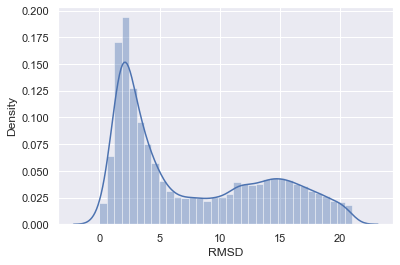

In [497]:
sns.distplot(df2['RMSD'])

Para un problema de regresión, lo más importante es comprender la distribución de nuestro objetivo. Ya que si un objetivo nos ayuda a comprender que tan grande es el valor de error obtenido y si es despreciable o no.

Vemos que en este caso, la mayor cantidad de residuos de proteinas tienen un tamaño de aproximadamente de 2.5

##### Correlaciones de a pares de las variables e histogramas

Visualizo la relación entre los atributos y el tamaño de las proteinas

<Figure size 432x288 with 0 Axes>

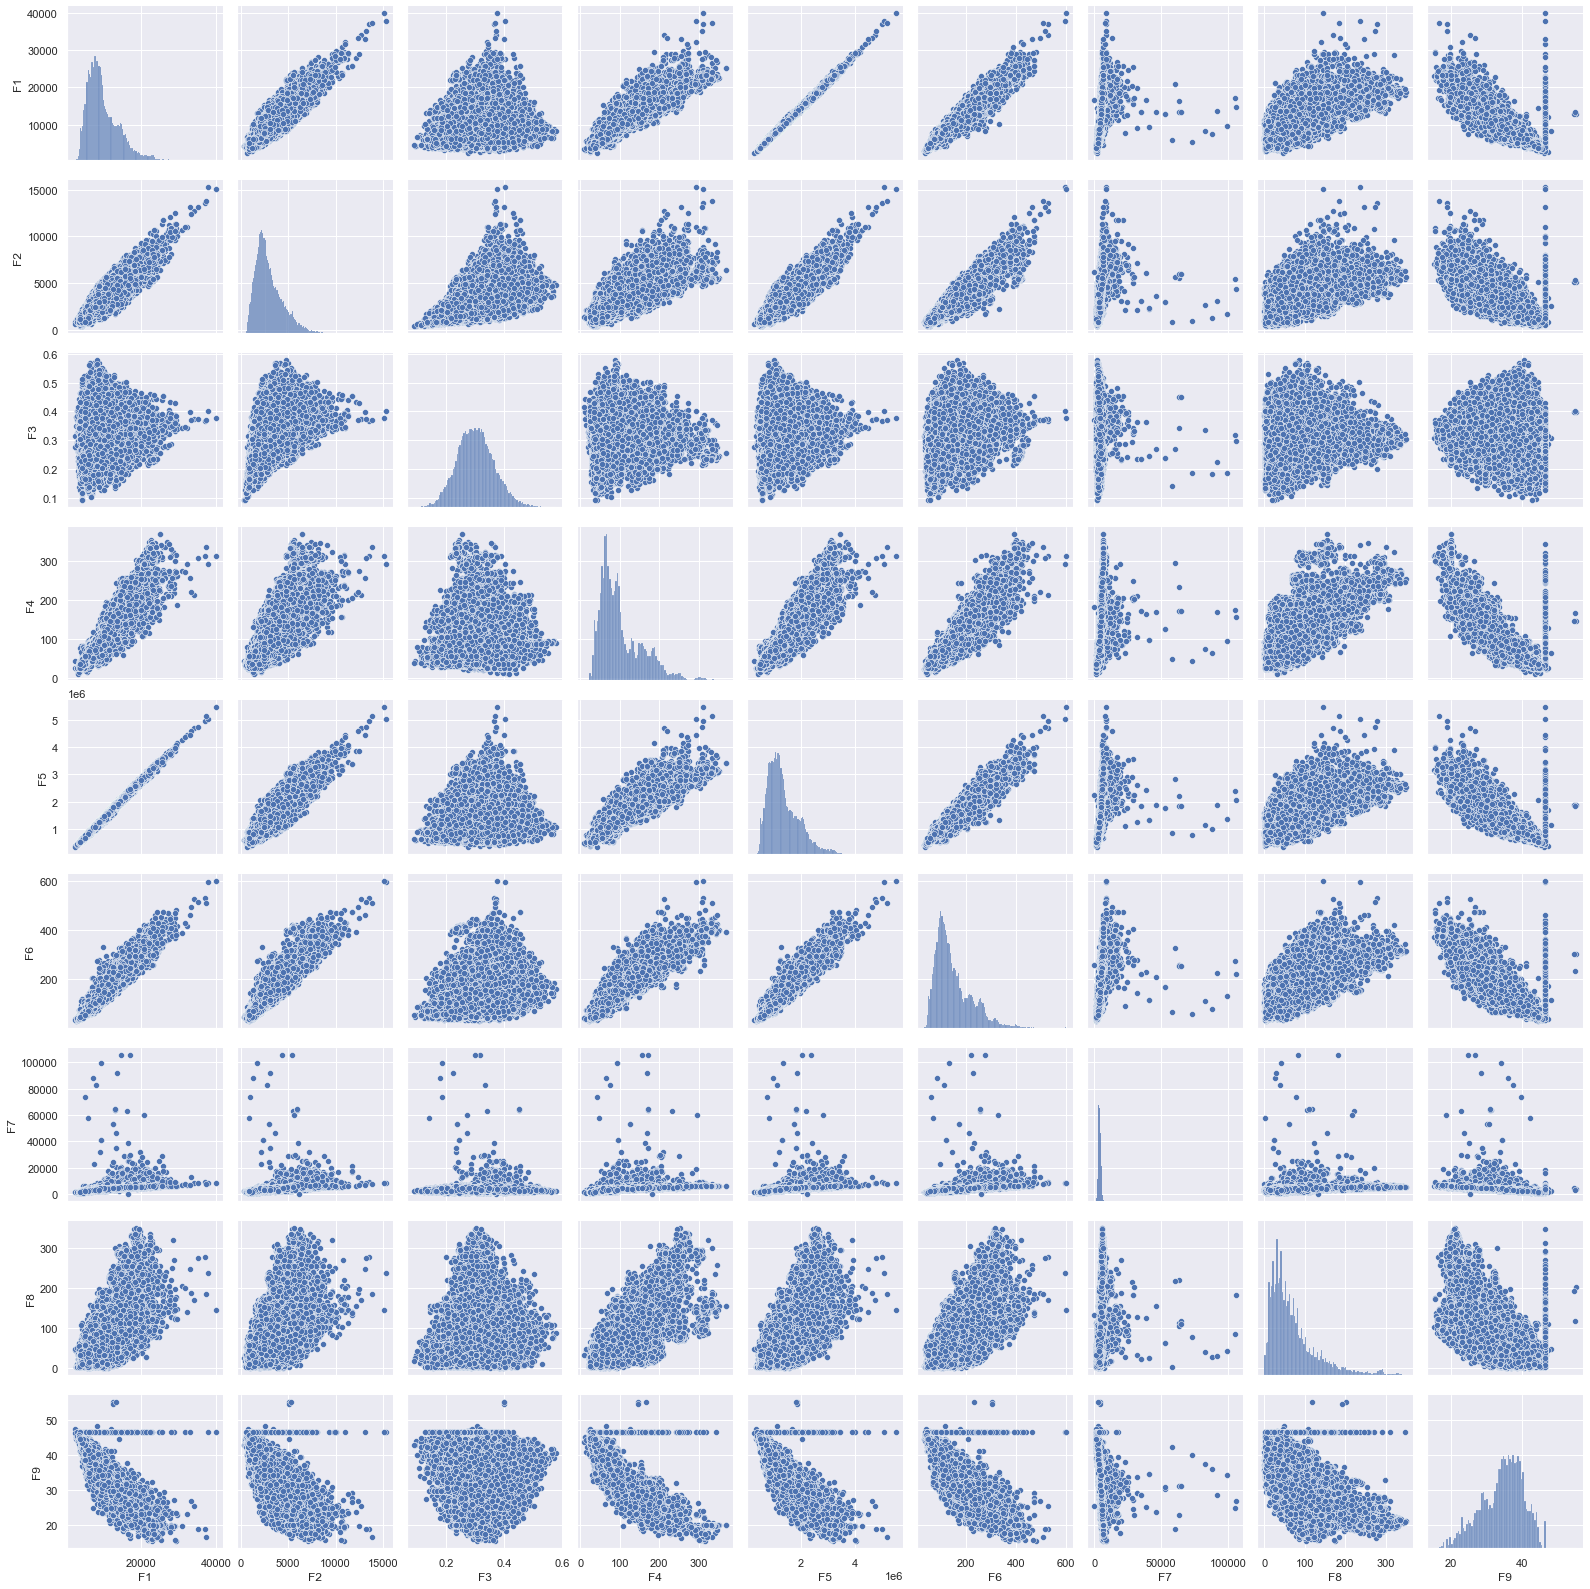

In [498]:
plt.figure()
sns.pairplot(df2[[ 'F1',  'F2', 'F3', 'F4', 'F5','F6','F7','F8','F9']])
plt.show()

Los puntos quedan muy encimados y, por este motivo, no se puede extraer mucha información del gráfico.
Sin embargo, vemos que las variables F1 y F5 tienen una correlación lineal. 

##### Matriz de correlación

In [ ]:
corr2 = df2.corr()
corr2.style.background_gradient()
corr2.style.background_gradient().set_precision(2)

C:\Users\vale_\AppData\Local\Temp\ipykernel_14868\2728287721.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr2.style.background_gradient().set_precision(2)


,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
RMSD,1.00,-0.02,0.16,0.37,-0.17,-0.01,-0.04,-0.00,0.00,0.06
F1,-0.02,1.00,0.91,0.13,0.93,1.00,0.97,0.55,0.65,-0.90
F2,0.16,0.91,1.00,0.50,0.79,0.90,0.91,0.52,0.58,-0.79
F3,0.37,0.13,0.50,1.00,0.03,0.12,0.20,0.08,0.10,-0.07
F4,-0.17,0.93,0.79,0.03,1.00,0.93,0.94,0.49,0.68,-0.89
F5,-0.01,1.00,0.90,0.12,0.93,1.00,0.96,0.55,0.64,-0.90
F6,-0.04,0.97,0.91,0.20,0.94,0.96,1.00,0.54,0.66,-0.88
F7,-0.00,0.55,0.52,0.08,0.49,0.55,0.54,1.00,0.35,-0.52
F8,0.00,0.65,0.58,0.10,0.68,0.64,0.66,0.35,1.00,-0.64
F9,0.06,-0.90,-0.79,-0.07,-0.89,-0.90,-0.88,-0.52,-0.64,1.00


Vemos a partir de la matriz, que como era de esperar los atributos F1 y F5 tienen una correlación de 1.00. Además observamos que hay otras variables que también estan altamente correlacionadas, como por ejemplo: F1 y F2, F1 y F4, F2 y F5, F1 y F4 y F2 y F6.

Por otro lado, vemos que el atributo que mayor correlación tiene con el tamaño(RMSD) es el F3: Área fraccional de residuo no polar expuesto. También vemos que el F2 tiene una correlación bastante alta también.

#### Regresión lineal

In [537]:
df2_rl = df2.copy()

X = df2_rl.drop("RMSD", axis=1)
y = df2_rl["RMSD"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (32011, 9)
Shape of X_test:  (13719, 9)
Shape of y_train:  (32011,)
Shape of y_test (13719,)


In [548]:
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.28341053083882634
R2_score (train):  0.2843173416834447
R2_score (test):  0.2773905504196428
RMSE:  5.191359668007029


##### Features polinomiales (orden 2)

In [550]:
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_poly, y_train)

# Predicting Cross Validation Score the Test set results
cv_poly2 = cross_val_score(estimator = regressor_poly2, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(X_train))
r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)

# Predicting R2 Score the Test set results
y_pred_poly2_test = regressor_poly2.predict(poly_reg.fit_transform(X_test))
r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)

# Predicting RMSE the Test set results
rmse_poly2 = (np.sqrt(mean_squared_error(y_test, y_pred_poly2_test)))
print('CV: ', cv_poly2.mean())
print('R2_score (train): ', r2_score_poly2_train)
print('R2_score (test): ', r2_score_poly2_test)
print("RMSE: ", rmse_poly2)

CV:  0.28341053083882634
R2_score (train):  0.37020799822216144
R2_score (test):  0.3411445228742095
RMSE:  4.957062341596903


##### Features polinomiales (orden 3)

In [552]:
poly_reg3 = PolynomialFeatures(degree = 3)
X_poly3 = poly_reg3.fit_transform(X_train)
poly_reg3.fit(X_poly3, y_train)
regressor_poly3 = LinearRegression()
regressor_poly3.fit(X_poly3, y_train)

# Predicting Cross Validation Score the Test set results
cv_poly3 = cross_val_score(estimator = regressor_poly3, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_poly3_train = regressor_poly3.predict(poly_reg3.fit_transform(X_train))
r2_score_poly3_train = r2_score(y_train, y_pred_poly3_train)

# Predicting R2 Score the Test set results
y_pred_poly3_test = regressor_poly3.predict(poly_reg3.fit_transform(X_test))
r2_score_poly3_test = r2_score(y_test, y_pred_poly3_test)

# Predicting RMSE the Test set results
rmse_poly3 = (np.sqrt(mean_squared_error(y_test, y_pred_poly3_test)))
print('CV: ', cv_poly3.mean())
print('R2_score (train): ', r2_score_poly3_train)
print('R2_score (test): ', r2_score_poly3_test)
print("RMSE: ", rmse_poly3)

CV:  0.28341053083882634
R2_score (train):  0.34381423977167924
R2_score (test):  -3.062360125192366
RMSE:  12.308879235902346


Aclaración: el valor de R2_score para test da negativo y no estoy segura de como interpretarlo.

##### Comparación

In [555]:
models = [('Linear Regression', rmse_linear, r2_score_linear_train, r2_score_linear_test, cv_linear.mean()),
          ('Polynomial Regression (2°)', rmse_poly2, r2_score_poly2_train, r2_score_poly2_test, cv_poly2.mean()),
          ('Polynomial Regression (3°)', rmse_poly3, r2_score_poly3_train, r2_score_poly3_test, cv_poly3.mean())]

predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,5.191360,0.284317,0.277391,0.283411
1,Polynomial Regression (2°),4.957062,0.370208,0.341145,0.283411
2,Polynomial Regression (3°),12.308879,0.343814,-3.062360,0.283411


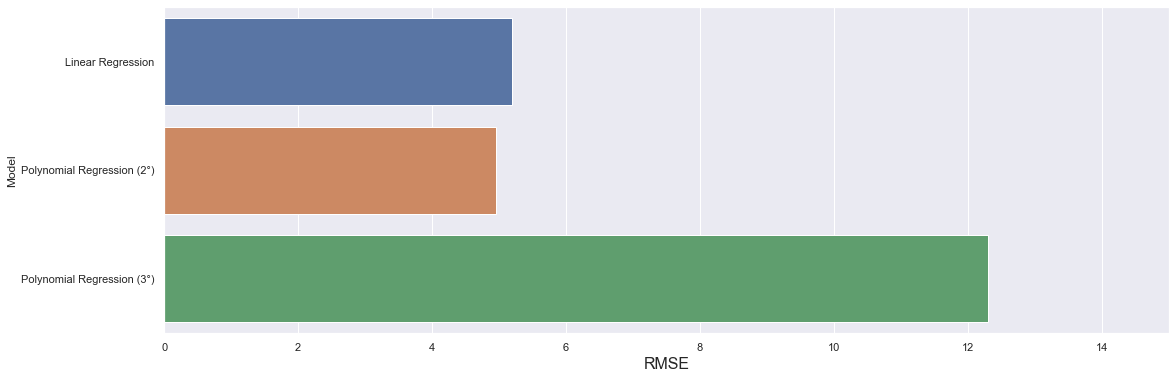

In [560]:
f, axe = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='RMSE', y='Model', data = predict, ax = axe)
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('RMSE', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,15)
plt.show()

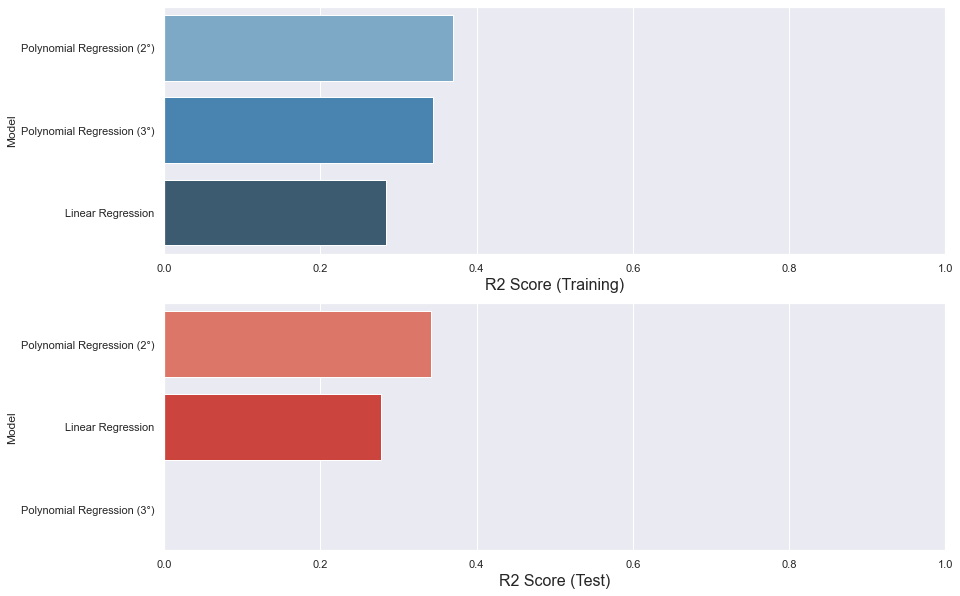

In [561]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['R2_Score(training)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(training)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('R2 Score (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)

predict.sort_values(by=['R2_Score(test)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('R2 Score (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)

plt.show()

Vemos que el modelo que mejores valores de R2 tiene es el que utiliza features polinomiales de orden 2.

#### Ingeniería de features

##### Selección de features

Selecciono las características numéricas que tienen una tasa de correlación superior a 0,10 o inferior a -0,10 según el método de correlación de Pearson, que es el valor predeterminado del parámetro "método" en la función corr() utilizada anteriormente (Matriz de correlación).

In [562]:
important_num_cols = list(df2.corr()["RMSD"][(df2.corr()["RMSD"]>0.10) | (df2.corr()["RMSD"]<-0.10)].index)
important_num_cols
df2_ing_feat = df2[important_num_cols]
df2_ing_feat

,RMSD,F2,F3,F4
0,17.284,4305.35,0.31754,162.1730
1,6.021,1623.16,0.26213,53.3894
2,9.275,1726.28,0.22343,67.2887
3,15.851,2368.25,0.28111,67.8325
4,7.962,1736.94,0.23280,52.4123
...,...,...,...,...
45725,3.762,2777.68,0.34560,64.3390
45726,6.521,2508.57,0.31440,75.8654
45727,10.356,2489.58,0.32220,70.9903
45728,9.791,3055.78,0.34416,94.0314


##### Correlación de a pares de las variables seleccionadas e histogramas

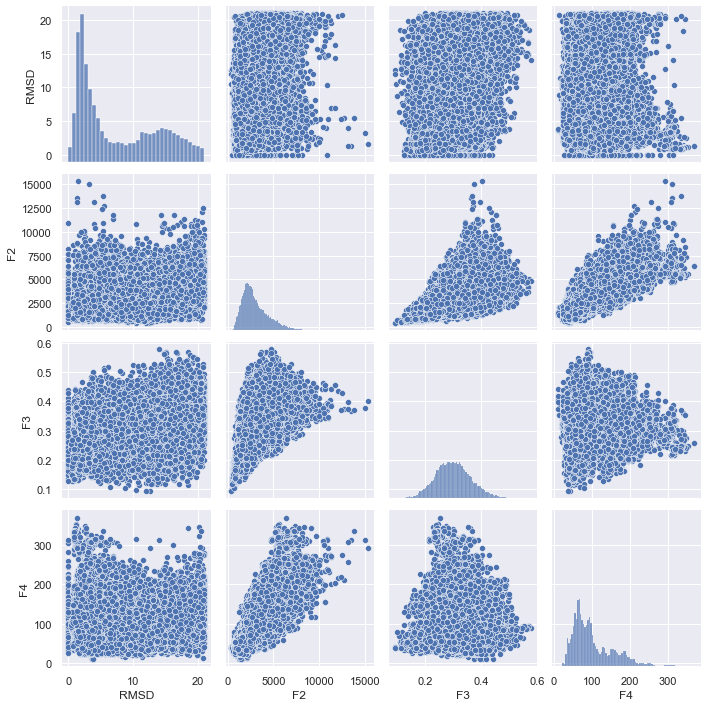

In [521]:
sns.pairplot(df2_ing_feat)

##### Visualización de la correlación entre cada variable seleccionada y la variable RMSD mediante la visualización de gráficos conjuntos

<Figure size 720x576 with 0 Axes>

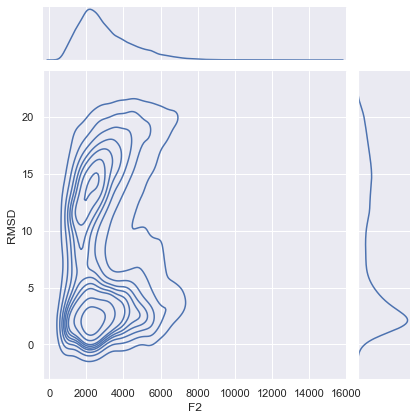

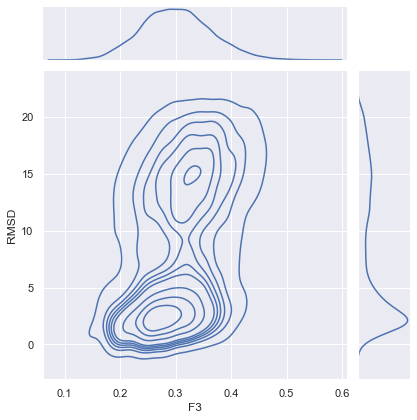

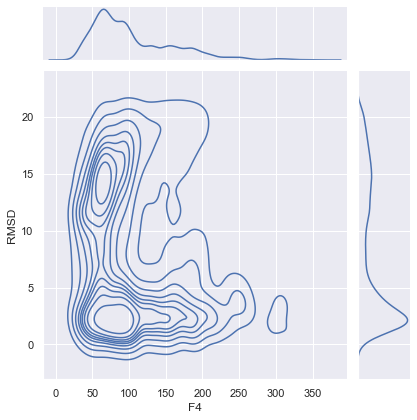

In [522]:
plt.figure(figsize=(10,8))
sns.jointplot(x=df2["F2"], y=df2["RMSD"], kind="kde")
sns.jointplot(x=df2["F3"], y=df2["RMSD"], kind="kde")
sns.jointplot(x=df2["F4"], y=df2["RMSD"], kind="kde")
plt.show()

##### Clasificación

In [563]:
df2_ing_feat_copy = df2_ing_feat.copy()

X = df2_ing_feat_copy.drop("RMSD", axis=1)
y = df2_ing_feat_copy["RMSD"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [564]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [565]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

MAE: 4.473811190348931
MSE: 28.262330401721595
RMSE: 5.316232726444695
R2 Score: 0.24899506604846844
------------------------------
RMSE Cross-Validation: 5.270667649768531


In [566]:
poly_reg = PolynomialFeatures(degree=2)
X_train_2d = poly_reg.fit_transform(X_train)
X_test_2d = poly_reg.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2d, y_train)
predictions = lin_reg.predict(X_test_2d)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

MAE: 4.32175183224172
MSE: 27.003539532477923
RMSE: 5.196493003216489
R2 Score: 0.28244447167701303
------------------------------
RMSE Cross-Validation: 5.270667649768531


Vemos que los resultados no son mejores a los obtenidos anteriormente al utilizar todos los features y la regresión polinomial de orden 2.